<a href="https://colab.research.google.com/github/manasaiyandra/CODSOFT/blob/main/Mllearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
create a model of spam sms detection

Here is all the data you need:
"spam.csv"

## Data loading

### Subtask:
Load the spam detection dataset.


**Reasoning**:
Load the spam detection dataset and inspect its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'spam.csv' not found. Please ensure the file is in the current directory or provide the correct path.")
except Exception as e:
    print(f"An error occurred: {e}")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


(5572, 5)


## Data exploration

### Subtask:
Explore the loaded spam dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by checking data types, target variable distribution, missing values, duplicates, and text data characteristics.



In [ ]:
# Check data types
print(df.dtypes)

# Analyze target variable distribution
print(df['v1'].value_counts(normalize=True) * 100)

# Identify missing values
print(df.isnull().sum())

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Explore text data (message length distribution and unusual characters)
df['message_length'] = df['v2'].str.len()
print(df['message_length'].describe())
# Example: Check for messages containing non-ASCII characters
# print(df[~df['v2'].str.isascii()])  # Uncomment to check non-ASCII

# Summarize findings
print("\nSummary:")
print("Data types seem appropriate, but 'Unnamed' columns may be redundant.")
print("Class imbalance: The dataset has more ham messages than spam.")
print(f"Missing values: The columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' have substantial missing values.")
print("Duplicate rows: There are duplicate rows in the data, which should be removed.")
print("Text data: The message length distribution varies significantly. Further investigation into unusual characters might be warranted.  Consider removing unnecessary columns.")

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object
v1
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64
Number of duplicate rows: 403
count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: message_length, dtype: float64

Summary:
Data types seem appropriate, but 'Unnamed' columns may be redundant.
Class imbalance: The dataset has more ham messages than spam.
Missing values: The columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' have substantial missing values.
Duplicate rows: There are duplicate rows in the data, which should be removed.
Text data: The message length distribution varies significantly. Further investigation into unusual characters might be warranted.  Consider

## Data cleaning

### Subtask:
Clean the spam dataset by handling missing values and removing duplicates.


**Reasoning**:
Drop irrelevant columns, remove duplicates, handle missing values in 'v1' and 'v2', and convert text to lowercase.



In [ ]:
# Drop irrelevant columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Remove duplicate rows
df = df.drop_duplicates(keep='first')

# Handle missing values in 'v1' and 'v2'
df = df.dropna(subset=['v1', 'v2'])

# Convert text messages to lowercase
df['v2'] = df['v2'].str.lower()
display(df.head())

,v1,v2,message_length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


## Feature engineering

### Subtask:
Transform the text data ('v2' column) in the cleaned DataFrame into numerical features using TF-IDF vectorization.


**Reasoning**:
Transform the text data ('v2' column) in the cleaned DataFrame into numerical features using TF-IDF vectorization, and replace the original 'v2' column with the numerical features.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the 'v2' column
X = tfidf_vectorizer.fit_transform(df['v2'])

# Convert to dense array
X_dense = X.toarray()

# Create a new DataFrame with TF-IDF features
df_tfidf = pd.DataFrame(X_dense, columns=tfidf_vectorizer.get_feature_names_out(), index=df.index)

# Concatenate with original df, dropping the original 'v2' column
df = pd.concat([df.drop('v2', axis=1), df_tfidf], axis=1)

display(df.head())

,v1,message_length,00,000,008704050406,0089,0121,01223585236,01223585334,0125698789,...,ìï,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò
0,ham,111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spam,155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split, ensuring stratified sampling and setting a random state for reproducibility. Then print the shapes of the resulting sets.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('v1', axis=1)
y = df['v1']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4135, 5001)
X_test shape: (1034, 5001)
y_train shape: (4135,)
y_test shape: (1034,)


## Model training

### Subtask:
Train a Logistic Regression model for spam detection.


**Reasoning**:
Train a Logistic Regression model using the training data.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Model evaluation

### Subtask:
Evaluate the trained Logistic Regression model.


**Reasoning**:
Evaluate the trained Logistic Regression model using the test data and calculate relevant metrics.



Accuracy: 0.9584139264990329
Precision: 0.9489795918367347
Recall: 0.7099236641221374
F1-score: 0.8122270742358079


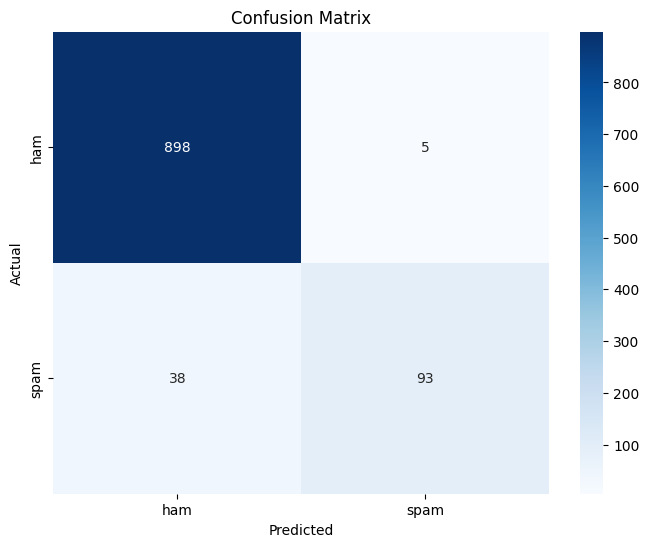

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')  # Assuming 'spam' is the positive class
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### 1. Q&A
No questions were posed in the provided data analysis task.


### 2. Data Analysis Key Findings
* **Class Imbalance:** The dataset has a significant class imbalance, with 86.59% of messages labeled as "ham" and 13.41% as "spam." This imbalance needs to be considered during model training and evaluation.
* **Data Cleaning:** Irrelevant columns ('Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4') and duplicate rows (403) were removed. Missing values in 'v1' and 'v2' columns were also handled by dropping the rows.
* **TF-IDF Vectorization:** Text data in the 'v2' column was transformed into numerical features using TF-IDF with `max_features=5000` and English stop words removed.
* **Model Performance:** The Logistic Regression model achieved an accuracy of 0.958, precision of 0.949, recall of 0.710, and an F1-score of 0.812 on the test set.  The model exhibits a lower recall, meaning it misclassifies some spam messages as ham.


### 3. Insights or Next Steps
* **Address Class Imbalance:** Explore techniques like oversampling the minority class (spam), undersampling the majority class (ham), or using class weights in the model to mitigate the impact of class imbalance on model performance.
* **Explore Other Models:**  Experiment with different classification models (e.g., Naive Bayes, Support Vector Machines, Random Forests) to see if they can improve upon the performance of the Logistic Regression model, particularly in terms of recall.  Consider models specifically designed for text data or imbalanced datasets.
